<a href="https://colab.research.google.com/github/Hemant051/GRIP-THE-SPARKS-FOUNDATION-HEMANT-YADAV/blob/main/Task_1_The_Sparks_Foundation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**THE SPARKS FOUNDATION**

**TASK 1 : PREDICTING USING SUPERVISED ML **

In this task we have to predict the percentage score of a student based on the number of hours studied. The task has two variables where the feature is the number of hours studied and the target value is the percentage score. This problem statement can be solved using Simple Linear Regression.


In [2]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [3]:
# Reading data from remote link
url = "http://bit.ly/w-data"
student_data = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


In [4]:
# Describing the dataset
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
# finding the null values in the dataset if any
student_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
# looking at the information of the given dataset using info keyword
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
# printing the first 10 rows of the dataset
student_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


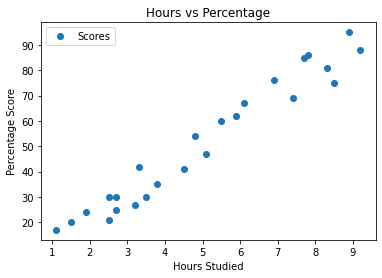

In [ ]:
# Plotting the distribution of scores
student_data.plot(x='Hours', y='Scores',style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [8]:
# assigning the values of hours and scores to the variables 
hours = student_data['Hours']
scores = student_data['Scores']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


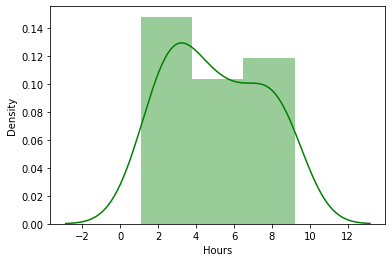

In [12]:
#a plot for hours of study using seaborn library
sns.distplot(hours,color = 'green')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


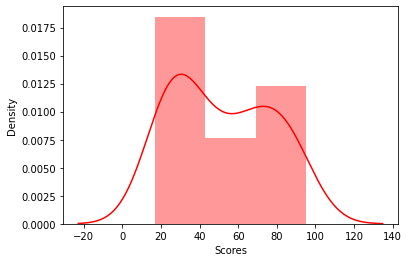

In [13]:
#a plot for scores of study using seaborn library
sns.distplot(scores, color = 'red')

In [ ]:
# splitting the data into training data and testing data
X_test = student_data.iloc[:, :-1].values  
y = student_data.iloc[:, 1].values  


In [ ]:
# importing the train_test_split from the sklearn library
from sklearn.model_selection import train_test_split 

# splitting the data for training and testing of the model
X_test=X_test.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)


In [ ]:
# importing LinearRegression model from sklearn library
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression() 
# fitting the model over training data 
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


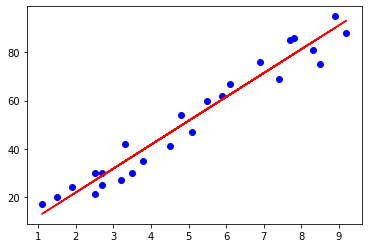

In [ ]:
# Making the linear Regression model 
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y,color = 'blue')
plt.plot(X, line,color = 'red');


In [ ]:
# Testing data - In Hours
print(X_test) 
# Predicting the scores
y_pred = regressor.predict(X_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [ ]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df.head() 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [ ]:
# testing the model with our own data and getting the predictions 

hours = 9.25

own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))


No of Hours = 9.25
Predicted Score = 93.69173248737539


In [ ]:
# importing metrics from sklearn to count the Mean Absolute Error
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
